<a href="https://colab.research.google.com/github/JogendraSingh1879/Text-Processing-NLP-Project/blob/main/NER_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name Entity Recogntion

In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [6]:
book=pd.read_csv("text.txt")

In [8]:
book = [x.strip() for x in book] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['Data science is an interdisciplinary field that uses scientific methods',
 'Unnamed: 1']

In [9]:
book

['Data science is an interdisciplinary field that uses scientific methods',
 'Unnamed: 1']

In [11]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

one_block = book[0]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [12]:
one_block

'Data science is an interdisciplinary field that uses scientific methods'

In [13]:
for token in doc_block[0:20]:
  print(token, token.pos_)

Data NOUN
science NOUN
is AUX
an DET
interdisciplinary ADJ
field NOUN
that PRON
uses VERB
scientific ADJ
methods NOUN


In [16]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[0:10])

['Data', 'science', 'field', 'uses', 'methods']


In [17]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,data,1
1,science,1
2,field,1
3,uses,1
4,methods,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

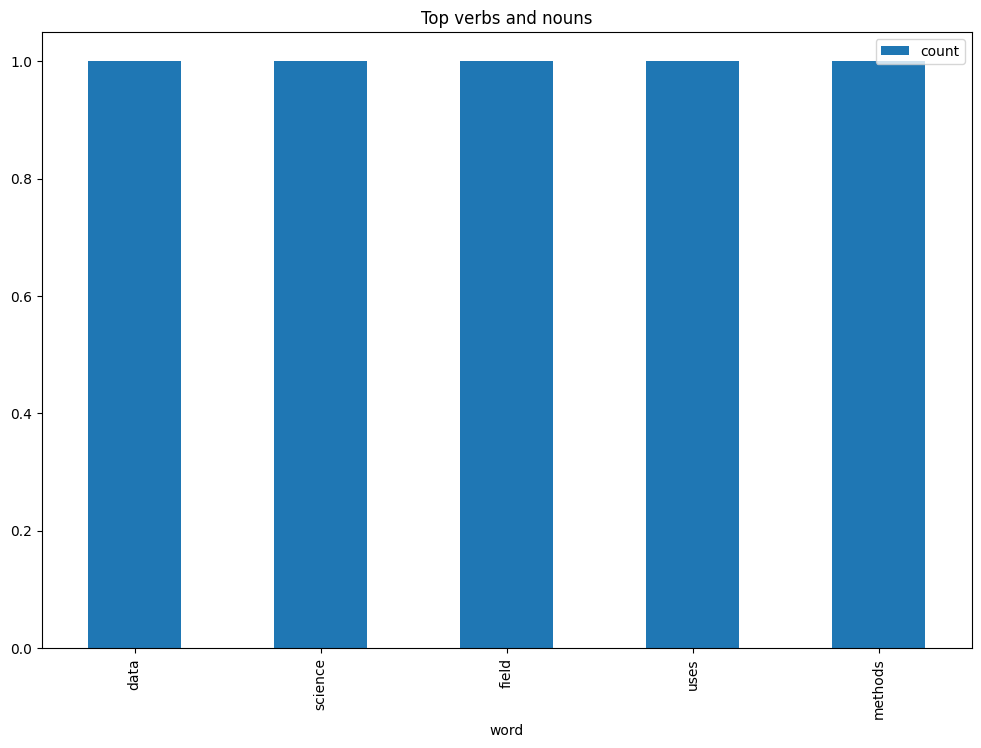

In [18]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Emotion Mining

In [19]:
#Sentiment analysis
import pandas as pd
afinn = pd.read_csv("text.txt",encoding = 'unicode_escape')
afinn

,Data science is an interdisciplinary field that uses scientific methods,Unnamed: 1
processes,algorithms,and systems to extract knowledge from data.


In [20]:
afinn[1:]

,Data science is an interdisciplinary field that uses scientific methods,Unnamed: 1


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("text.txt")
book = [x.strip() for x in book] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[0:10]

['Data science is an interdisciplinary field that uses scientific methods Unnamed: 1']

In [26]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Data science is an interdisciplinary field tha...


In [27]:
afinn.set_index()['value'].to_dict()

TypeError: DataFrame.set_index() missing 1 required positional argument: 'keys'